Task 1:- Stock Market Prediction anaysis using Supervised Machine Learning Algorithm.

Supervised Learning:  is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately.

Logistic Regression: It is used for predicting the categorical dependent variable using a given set of independent variables.it gives the probabilistic values which lie between 0 and 1.

In [ ]:
#Import basic necessary libraries
import numpy as np
import pandas as pd
#Below libraries used for Data visualization
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# libraries and functions used for building the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
#Importing the dataset from Kaggle Platform
df = pd.read_csv('/content/Tesla_Stock_Market_Values.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
df.shape

(2416, 7)

In [ ]:
from matplotlib import style
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


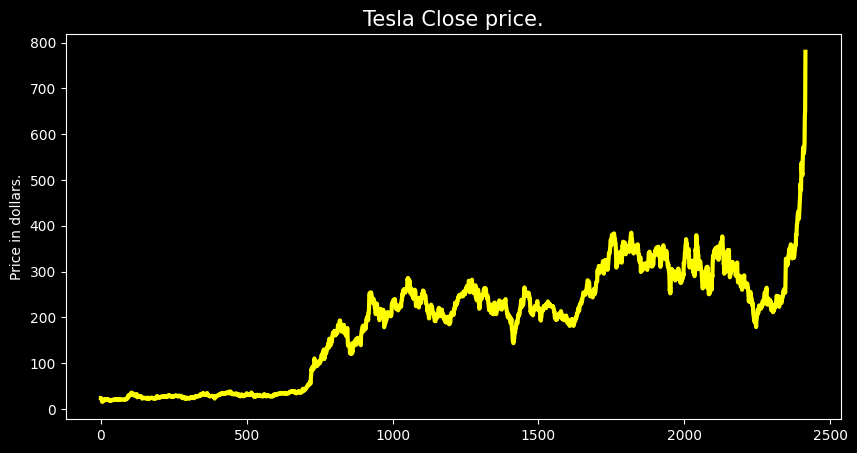

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'],color = 'yellow', linestyle="solid", linewidth=3)
plt.style.use('dark_background')

plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
#Fetch the initial top 5 values of the whole datasetA
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
#Fetch the initial bottom 5 values of the whole datasetA
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,28-01-2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,29-01-2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,30-01-2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,31-01-2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,03-02-2020,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [ ]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [ ]:
#Checking the availability of null values in the dataset
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<ipython-input-18-c0f407c3f593>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-18-c0f407c3f593>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-18-c0f407c3f593>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new

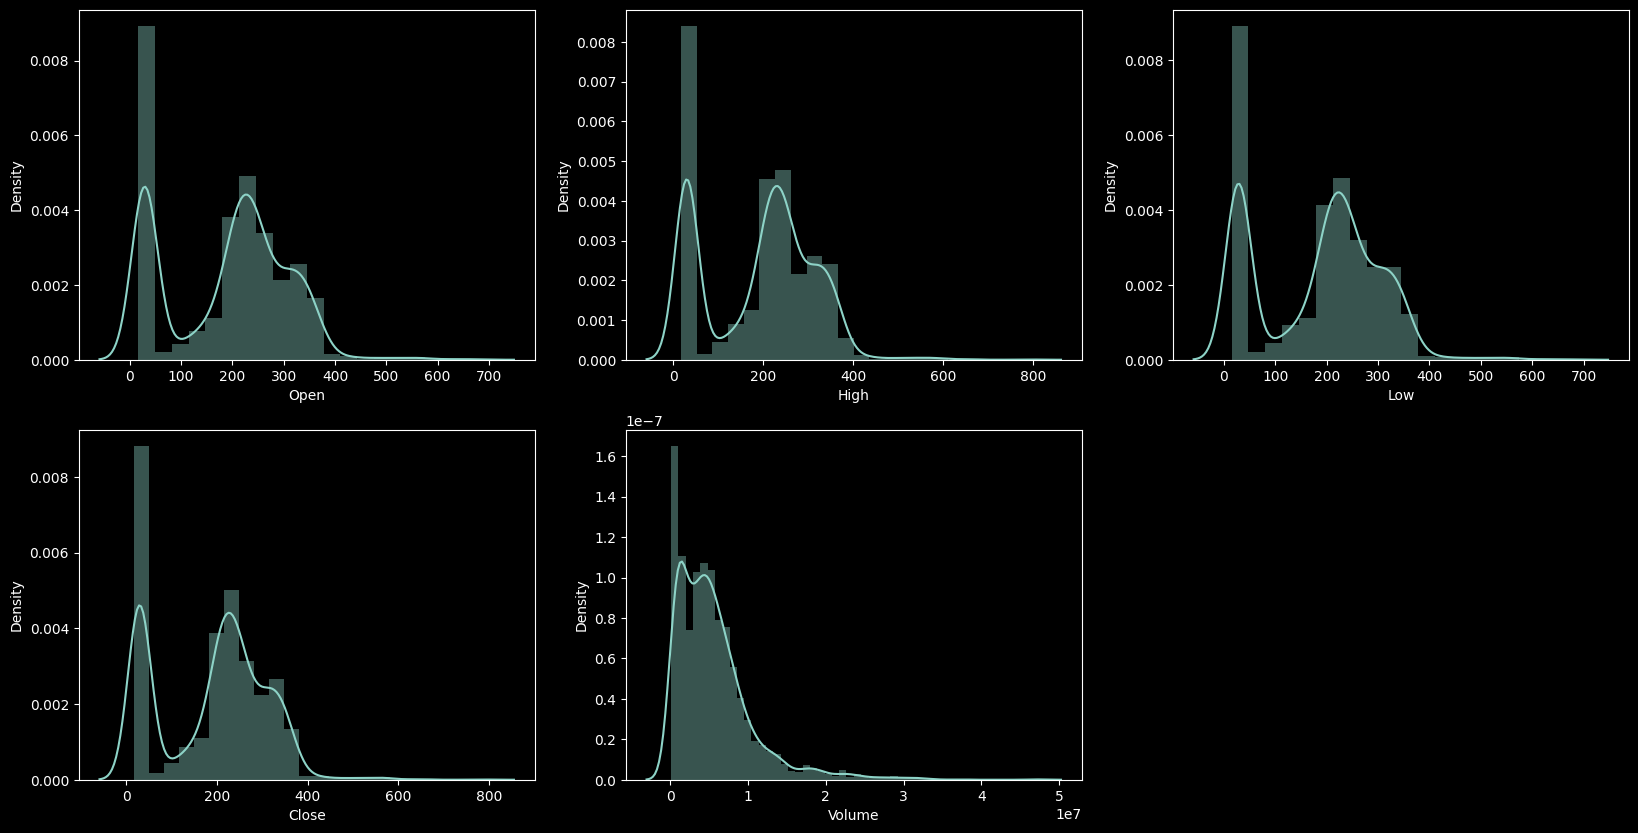

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
# Feature selection done to maintain the core data
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In [ ]:
#Separation of Day, Month and year done from Date format to predict the stock variations category wise.
df['Date'] = pd.to_datetime(df['Date'])
df[['year', 'month', 'day']] = df['Date'].apply(lambda x: x.timetuple()[:3]).tolist()


<ipython-input-19-882f2a8386bf>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
print(df['year'])

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2411    2020
2412    2020
2413    2020
2414    2020
2415    2020
Name: year, Length: 2416, dtype: int64


In [ ]:
print(df['month'])

0       6
1       6
2       1
3       2
4       6
       ..
2411    1
2412    1
2413    1
2414    1
2415    3
Name: month, Length: 2416, dtype: int64


In [ ]:
print(df['day'])

0       29
1       30
2        7
3        7
4        7
        ..
2411    28
2412    29
2413    30
2414    31
2415     2
Name: day, Length: 2416, dtype: int64


<ipython-input-23-25cecc36263e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


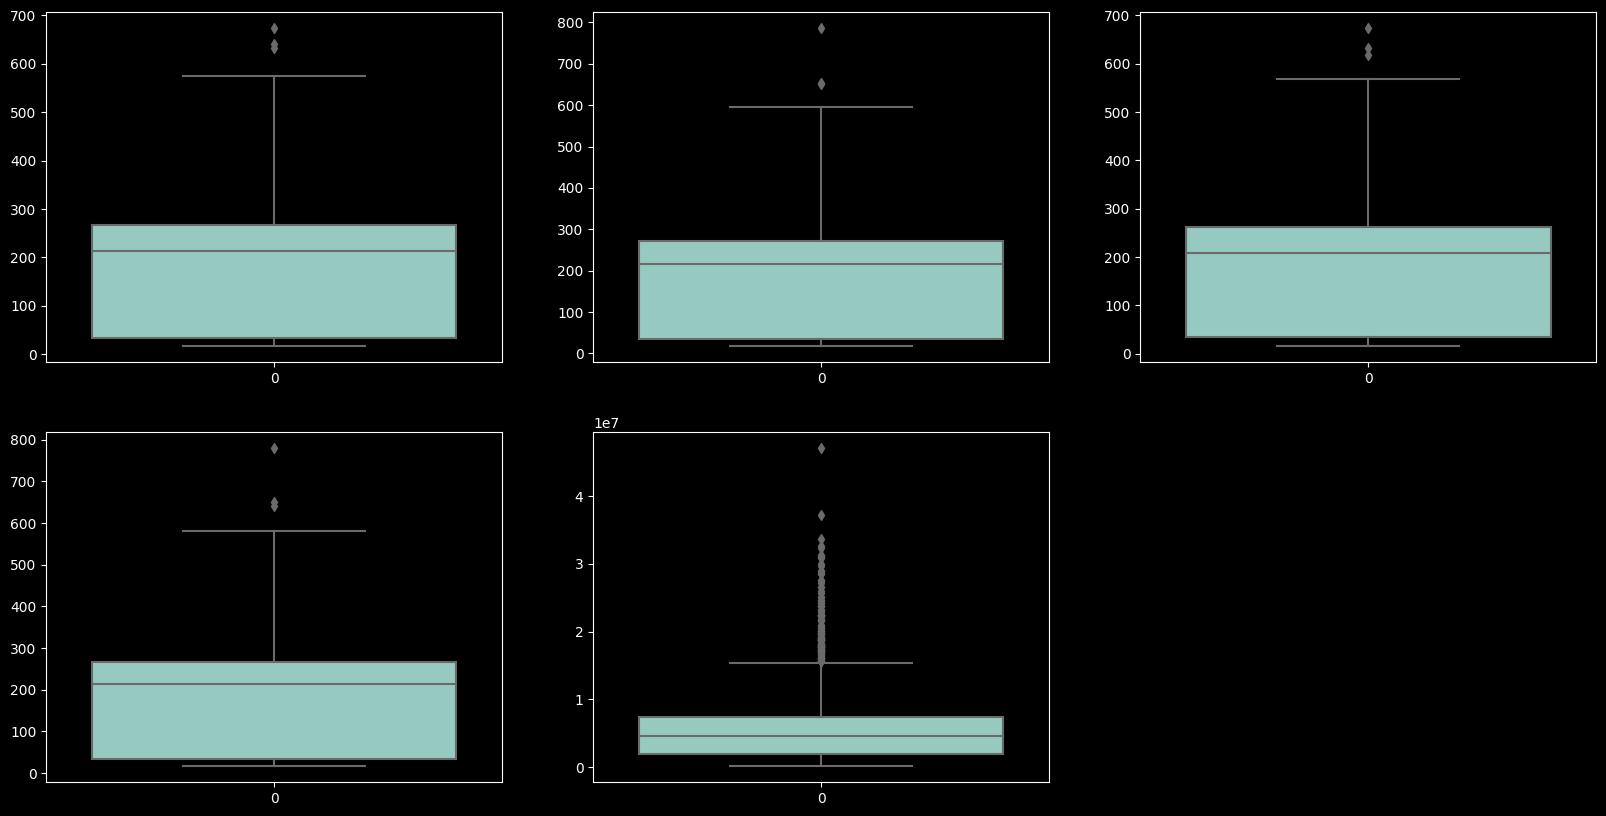

In [ ]:
#Finding the presence of outliers in the whole dataset so that model can give more precise prediction .
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


In [ ]:
df['End_quater'] = np.where(df['month']%3==0,1,0)
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,End_quater
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,1
2,2010-01-07,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,1,7,0
3,2010-02-07,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,2,7,0
4,2010-06-07,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,6,7,1


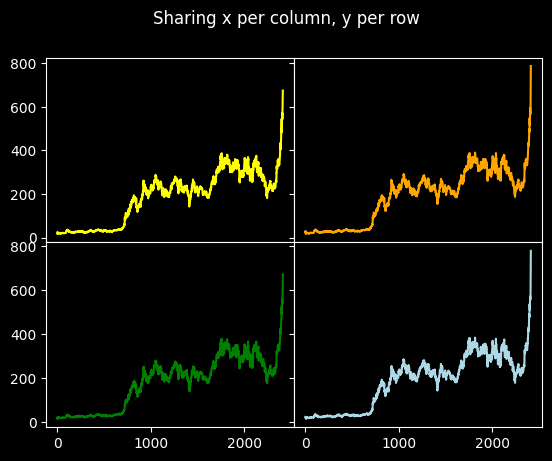

In [ ]:
#finding coorelation among the features of the data
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(df['Open'],color = 'yellow')
ax2.plot(df['High'],color = 'orange')
ax3.plot(df['Low'],color = 'green')
ax4.plot(df['Close'],color = 'lightblue')

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
df.groupby('End_quater').mean()

<ipython-input-26-f764fec7ebf2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('End_quater').mean()


,Open,High,Low,Close,Adj Close,Volume,year,month,day
End_quater,,,,,,,,,
0,185.740962,189.055753,182.406690,185.935459,185.935459,5.622638e+06,2014.800125,6.160525,15.816989
1,187.312650,190.604576,183.918393,187.323374,187.323374,5.474665e+06,2014.731288,7.568098,15.642945


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


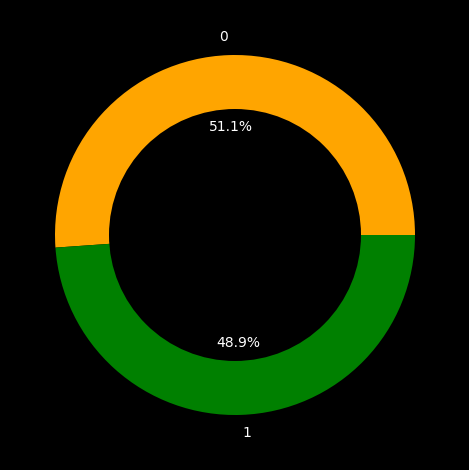

In [ ]:
plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%',colors=['orange', 'green'])

centre_circle = plt.Circle((0,0),0.70,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()




<ipython-input-29-60c6aa764d19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)


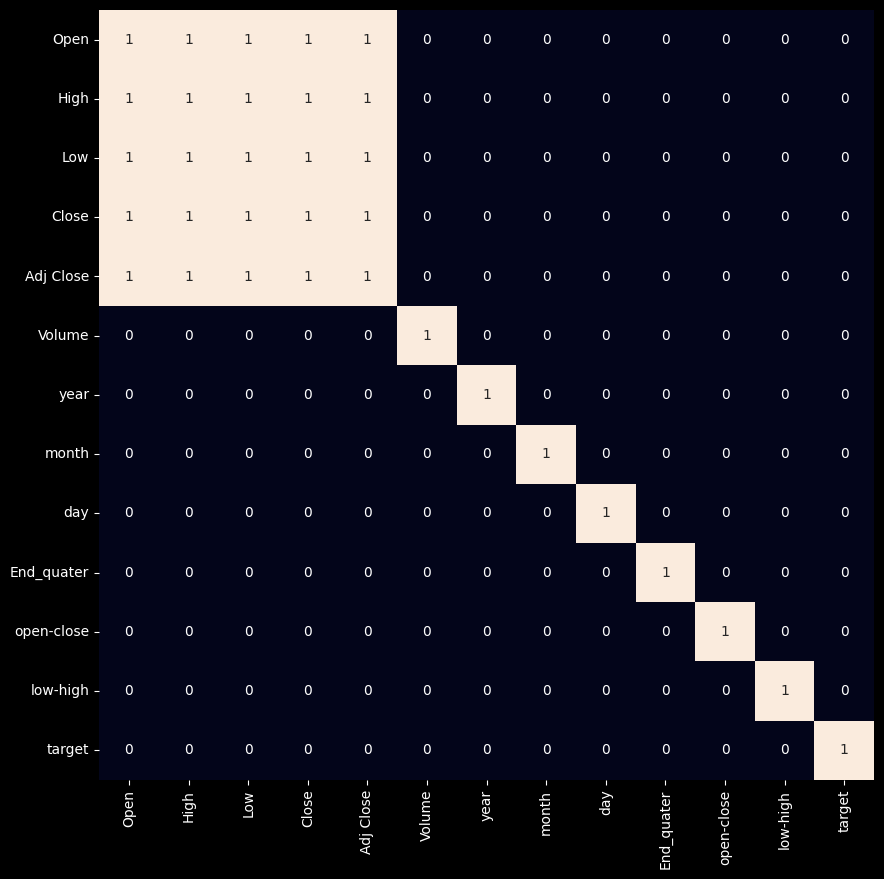

In [ ]:
#Using Heatmap to find the visualized corelation among the feature data entries
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = df[['open-close', 'low-high', 'End_quater']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [ ]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.9575403125092605
Validation Accuracy :  0.43199233716475094

